https://www.sciencedirect.com/science/article/pii/S1535610824000461?via%3Dihub#app2
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE247629

In [1]:
import scanpy as sc
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gzip
import numpy as np

In [2]:
path = '/data/kanferg/Sptial_Omics/playGround/Data/GSE247629_RAW'
os.listdir('/data/kanferg/Sptial_Omics/playGround/Data/GSE247629_RAW')

['GSM7898160_P4_barcodes.tsv.gz',
 'GSM7898159_P3_features.tsv.gz',
 'GSM7898159_P3_matrix.mtx.gz',
 'GSM7898157_P1_features.tsv.gz',
 'GSE247629_RAW.tar',
 'GSM7898158_P2_barcodes.tsv.gz',
 'GSM7898158_P2_matrix.mtx.gz',
 'GSM7898157_P1_barcodes.tsv.gz',
 'GSM7898157_P1_matrix.mtx.gz',
 'GSM7898160_P4_features.tsv.gz',
 'GSM7898159_P3_barcodes.tsv.gz',
 'GSM7898158_P2_features.tsv.gz',
 'unzip_script.sh',
 'GSM7898160_P4_matrix.mtx.gz']

In [3]:
andatap1 = sc.read_10x_mtx(path = path,prefix = 'GSM7898157_P1_')
andatap2 = sc.read_10x_mtx(path = path,prefix = 'GSM7898158_P2_')
andatap3 = sc.read_10x_mtx(path = path,prefix = 'GSM7898159_P3_')
andatap4 = sc.read_10x_mtx(path = path,prefix = 'GSM7898160_P4_')

In [10]:
def print_matrix(andata):
    print(f'spots: {andata.n_obs} genes: {andata.n_vars}')
print_matrix(andatap1)
print_matrix(andatap2)
print_matrix(andatap3)
print_matrix(andatap4)

spots: 4992 genes: 18050
spots: 3313 genes: 18050
spots: 4680 genes: 18050
spots: 2621 genes: 18050


Content of the barcodes.tsv.gz and features.tsv

In [19]:
def read_barcode_features(path,bc_file,ft_file):
    bc = os.path.join(path,bc_file)
    ft = os.path.join(path,ft_file)
    def unzip_read(file_path):
        with gzip.open(file_path, 'rt') as f:
            df = pd.read_csv(f, sep='\t')
        return df
    def report_df(df,text_table_type):
        print(f'{str(text_table_type)} Rows number: {len(df)} Columns number {len(df.columns)}')
    df_bc = unzip_read(bc)
    report_df(df_bc,"barcode")
    df_ft = unzip_read(ft)
    report_df(df_ft,"features")
    return df_bc, df_ft

path = path
bc_file = 'GSM7898157_P1_barcodes.tsv.gz'
ft_file = 'GSM7898159_P3_features.tsv.gz'
df_bc, df_ft = read_barcode_features(path,bc_file,ft_file)

barcode Rows number: 4991 Columns number 1
features Rows number: 18049 Columns number 3


1) Matrix.mtx.gz: This file contains the sparse matrix of gene expression data in the Market Matrix (MTX) format. Each entry in this matrix corresponds to a count of transcripts (or expression level) of a specific gene in a specific spatial barcode. The rows typically correspond to genes, and the columns correspond to the barcodes (cells or spots). The values in the matrix are the number of reads (or UMIs - Unique Molecular Identifiers) that have been mapped to each gene for each barcode. This is essentially where the actual data on gene expression is stored in quantitative form.

2) Gene count information: The gene count data is stored in the matrix.mtx.gz file. Each entry in this matrix is a gene count, indicating how many times a particular gene's RNA transcript was detected in a particular spatial barcode (spot on the tissue section). The matrix is used in conjunction with the features.tsv.gz and barcodes.tsv.gz files to interpret which gene and which spatial barcode each count corresponds to.

Regarding the barcode sequence (e.g., AACACGTGCATCGCAC-1), the sequence itself (before the dash) represents the unique identifier for a particular spot on the tissue sample where the gene expression is being measured. The "-1" at the end typically indicates a unique identifier for a specific sample or replicate in experiments where multiple samples or replicates are processed together. It helps differentiate barcodes that otherwise might be identical across different samples or sections.

In [25]:
from scipy.io import mmread

In [28]:
matrix_path = os.path.join(path,'GSM7898157_P1_matrix.mtx.gz')
matrix = mmread(matrix_path)
dense_matrix = matrix.todense()
df = pd.DataFrame(dense_matrix)
df

,0,1,2,3,4,5,6,7,8,9,...,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,2,0,0,0,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,3,...,0,0,0,1,2,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,44,64,80,71,75,2,50,89,59,73,...,85,31,55,49,99,39,5,82,46,3
18046,58,46,42,66,77,3,32,69,42,42,...,72,20,37,52,74,36,3,80,29,1
18047,67,49,55,77,72,4,36,69,33,52,...,116,28,72,64,93,40,7,89,33,4
18048,47,59,40,61,62,4,51,52,40,69,...,83,22,45,45,62,36,12,84,43,0


<center> Spatial transcriptomic analysis of Nf1+/- mouse brain
    
I couldn't find the article of this work but the GEO link:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE263303

In [29]:
path = '/data/kanferg/Sptial_Omics/playGround/Data/GSE263303_RAW'
os.listdir('/data/kanferg/Sptial_Omics/playGround/Data/GSE263303_RAW')

['GSM8189356_K73-6-FMFC-features.tsv.gz',
 'GSM8189356_K73-6-FMFC-barcodes.tsv.gz',
 'GSM8189357_K73-8-FMFC-features.tsv.gz',
 'GSM8189358_K75-1-FMFC-matrix.mtx.gz',
 'GSM8189358_K75-1-FMFC-features.tsv.gz',
 'GSM8189357_K73-8-FMFC.tif.gz',
 'GSM8189356_K73-6-FMFC-matrix.mtx.gz',
 'GSM8189359_K75-2-FMFC-matrix.mtx.gz',
 'GSM8189359_K75-2-FMFC-barcodes.tsv.gz',
 'GSM8189359_K75-2-FMFC-features.tsv.gz',
 'GSM8189356_K73-6-FMFC.tif.gz',
 'GSE263303_RAW.tar',
 'GSM8189358_K75-1-FMFC-barcodes.tsv.gz',
 'GSM8189357_K73-8-FMFC-barcodes.tsv.gz',
 'GSM8189357_K73-8-FMFC-matrix.mtx.gz',
 'GSM8189359_K75-2-FMFC.tif.gz',
 'GSM8189358_K75-1-FMFC.tif.gz']

In [30]:
def read_barcode_features(path,bc_file,ft_file):
    bc = os.path.join(path,bc_file)
    ft = os.path.join(path,ft_file)
    def unzip_read(file_path):
        with gzip.open(file_path, 'rt') as f:
            df = pd.read_csv(f, sep='\t')
        return df
    def report_df(df,text_table_type):
        print(f'{str(text_table_type)} Rows number: {len(df)} Columns number {len(df.columns)}')
    df_bc = unzip_read(bc)
    report_df(df_bc,"barcode")
    df_ft = unzip_read(ft)
    report_df(df_ft,"features")
    return df_bc, df_ft

path = path
bc_file = 'GSM8189358_K75-1-FMFC-barcodes.tsv.gz'
ft_file = 'GSM8189359_K75-2-FMFC-features.tsv.gz'
df_bc, df_ft = read_barcode_features(path,bc_file,ft_file)

barcode Rows number: 2319 Columns number 1
features Rows number: 32284 Columns number 3


In [32]:
df_ft

,ENSMUSG00000051951,Xkr4,Gene Expression
0,ENSMUSG00000089699,Gm1992,Gene Expression
1,ENSMUSG00000102331,Gm19938,Gene Expression
2,ENSMUSG00000102343,Gm37381,Gene Expression
3,ENSMUSG00000025900,Rp1,Gene Expression
4,ENSMUSG00000025902,Sox17,Gene Expression
...,...,...,...
32279,ENSMUSG00000095523,AC124606.1,Gene Expression
32280,ENSMUSG00000095475,AC133095.2,Gene Expression
32281,ENSMUSG00000094855,AC133095.1,Gene Expression
32282,ENSMUSG00000095019,AC234645.1,Gene Expression


In [33]:
andatap1 = sc.read_10x_mtx(path = path,prefix = 'GSM8189358_K75-1-FMFC-')

In [34]:
andatap1

AnnData object with n_obs × n_vars = 2320 × 32285
    var: 'gene_ids', 'feature_types'

<center><B><h3> Netrin-1 blockade inhibits tumour growth and EMT features in endometrial cancer

https://pubmed.ncbi.nlm.nih.gov/37532934/
    
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE225691    

In [4]:
path_034_C1d1 = '/data/kanferg/Sptial_Omics/playGround/Data/GSE225691_RAW/01_034_C1d1/outs'
path_039_C1d1 = '/data/kanferg/Sptial_Omics/playGround/Data/GSE225691_RAW/01_039_C1d1/outs'
path_034_C3d1 = '/data/kanferg/Sptial_Omics/playGround/Data/GSE225691_RAW/01_034_C3d1/outs'
path_039_C3d1 = '/data/kanferg/Sptial_Omics/playGround/Data/GSE225691_RAW/01_039_C3d1/outs'

In [5]:
import warnings
warnings.filterwarnings('ignore')
def read_nature_files(path):
    andata = sc.read_visium(path = path)
    print(f'spots: {andata.n_obs} genes: {andata.n_vars}')
    return andata
adata_034_c1d1 = read_nature_files(path_034_C1d1)
adata_039_C1d1 = read_nature_files(path_039_C1d1)
adata_034_C3d1 = read_nature_files(path_034_C3d1)
adata_039_C3d1 = read_nature_files(path_039_C3d1)

spots: 539 genes: 17943
spots: 1091 genes: 17943
spots: 755 genes: 17943
spots: 2141 genes: 17943


In [4]:
warnings.filterwarnings('default')

adata_034_c1d1

### Squidpy Analysis

In [20]:
np.shape(adata_034_c1d1.obsm['spatial'])

(539, 2)

In [5]:
adata_034_c1d1.obsm['spatial']

array([[1216,  722],
       [1526, 1391],
       [1896, 2563],
       ...,
       [1702, 2161],
       [1082, 1024],
       [1664, 2295]])

<h2> Save squidepy data to spot-gene-count tabel

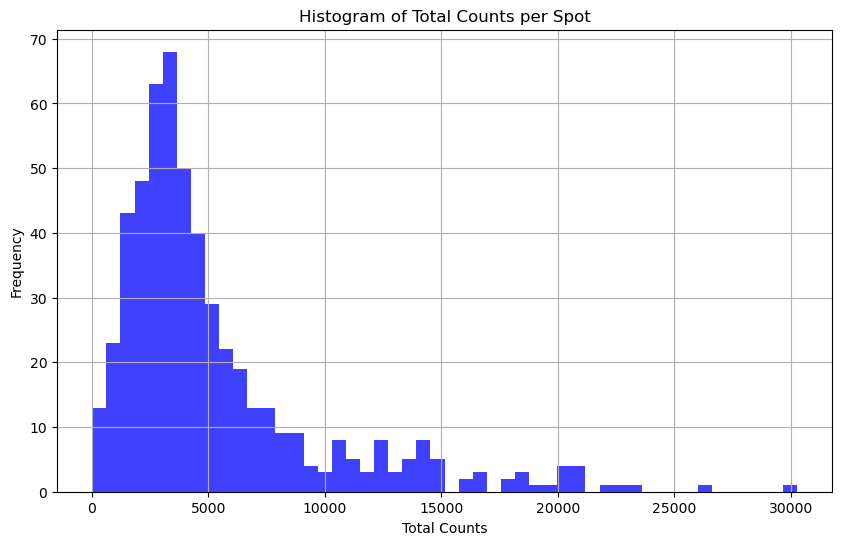

In [25]:
df = adata_034_c1d1.to_df()
row_sums = df.sum(axis=1)

# Plotting the histogram of the row sums
plt.figure(figsize=(10, 6))
plt.hist(row_sums, bins=50, alpha=0.75, color='blue')
plt.title('Histogram of Total Counts per Spot')
plt.xlabel('Total Counts')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
np.shape(adata_034_c1d1.uns['spatial']['01_034_C1d1']['images']['hires'])

(2000, 1954, 3)

In [32]:
df["x"] = adata_034_c1d1.obsm['spatial'][:,0]
df["y"] = adata_034_c1d1.obsm['spatial'][:,1]
df.insert(0,"CellID",np.arange(len(df)))

In [33]:
df.to_csv("adata_034_c1d1.csv",index=False)


In [30]:
df.head()

,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,...,PCDH11Y,AMELY,TBL1Y,TSPY1,USP9Y,DDX3Y,TMSB4Y,KDM5D,x,y
AAACCTAAGCAGCCGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1216,722
AAACTGCTGGCTCCAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1526,1391
AAAGACCCAAGTCGCG-1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1896,2563
AAAGGGATGTAGCAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1625,2094
AAAGTCACTGATGTAA-1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1819,2563


[youtube](https://www.youtube.com/watch?v=btqPgui8gpg&t=4665s)

<h3>Image Container<h3>

Creats ```ImageContainer``` object from high-resolution image. 

In [ ]:
img034_c1d1 = sq.im.ImageContainer(
    adata_034_c1d1.uns['spatial']['01_034_C1d1']['images']['hires'],
    scale=adata_034_c1d1.uns['spatial']['01_034_C1d1']['images']['hires']
)

<h3> Image features <h3>

In [6]:
adata_034_c1d1.uns['spatial']['01_034_C1d1']['images']['hires']

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0

In [7]:
adata_034_c1d1.uns['spatial']['01_034_C1d1']

{'images': {'hires': array([[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
  
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
  
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
  
         ...,
  
         [[0.99607843, 0.99607843, 0.996078

<bound method Mapping.values of AxisArrays with keys: spatial>